In [113]:
import numpy as np
from numpy import linalg as la
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
import seaborn
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import warnings

In [39]:
gray_image = Image.open('img1.png').convert('L')

In [34]:
# creating an og_image object
og_image = Image.open("./img1.png")
og_image.show()

# applying grayscale method
gray_image = ImageOps.grayscale(og_image)
gray_image.show()

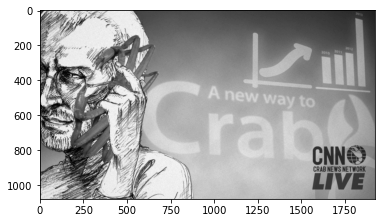

In [65]:
arr = np.array(gray_image)
plt.imshow(arr, cmap='gray')

In [83]:
pca0 = PCA()
pca0.fit(arr)
pca0.components_.shape
pca0.n_components_

1080

In [84]:
pca = PCA(n_components=0)
pca.fit(arr)
transform = pca.transform(arr)
pca.components_

array([], shape=(0, 1920), dtype=float64)

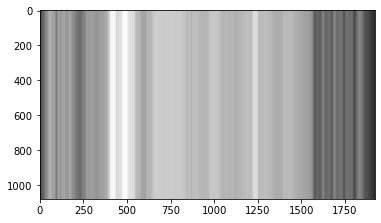

In [75]:
plt.imshow(pca.inverse_transform(transform), cmap='gray')

In [126]:
%%time
lim = pca0.n_components_
ssim_arr = []
ssim_n = 0.
n = 0
while(ssim_n < 0.9):
    pca = PCA(n_components=n)
    pca.fit(arr)
    transform = pca.transform(arr)
    arr_trans = pca.inverse_transform(transform)
    ssim_n = ssim(arr, arr_trans, data_range=arr_trans.max() - arr_trans.min())
    ssim_arr.append(ssim_n)
    n += 1

CPU times: user 3min 35s, sys: 32.3 s, total: 4min 8s
Wall time: 31.7 s


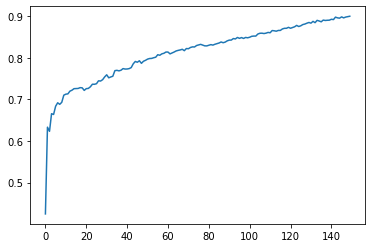

In [97]:
ns = np.arange(0, lim)
fig, ax = plt.subplots()
ax.plot(ssim_arr)

In [101]:
n_comps = 10
ipca = IncrementalPCA(n_components=n_comps)

In [103]:
for i in range(len(arr) // n_comps):
    batch = arr[n_comps * i: n_comps * (i + 1)]
    ipca.partial_fit(batch)

/Users/elizavetaivanova/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_incremental_pca.py:348: RuntimeWarning: Mean of empty slice.
  self.noise_variance_ = explained_variance[self.n_components_ :].mean()
/Users/elizavetaivanova/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [107]:
ipca_trans = ipca.transform(arr)
ipca.inverse_transform(ipca_trans)

array([[ 26.58748172,  37.14915265,  44.09858435, ...,  20.95704583,
         19.48091933,  17.0723994 ],
       [ 49.02181368,  63.69363572,  70.01264636, ...,  25.7363979 ,
         24.3560773 ,  20.79925318],
       [ 51.01542356,  66.24427559,  72.74178477, ...,  26.9072694 ,
         25.4929641 ,  21.6767214 ],
       ...,
       [157.33090715, 184.28329676, 179.78468666, ..., 109.8016205 ,
        110.180337  ,  86.26191983],
       [157.14097606, 184.2336983 , 179.96316527, ..., 110.3275482 ,
        110.61839157,  86.56104551],
       [117.32111799, 138.80144658, 137.41029376, ...,  91.80677121,
         91.67639472,  72.1250647 ]])

In [125]:
%%time
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    issim_arr = []
    issim_n = 0.
    ni = 1
    while(issim_n < 0.9):
        ipca = IncrementalPCA(n_components=ni)
        for i in range(len(arr) // ni):
            batch = arr[ni * i: ni * (i + 1)]
            ipca.partial_fit(batch)
        transform = ipca.transform(arr)
        arr_trans = ipca.inverse_transform(transform)
        issim_n = ssim(arr, arr_trans, data_range=arr_trans.max() - arr_trans.min())
        issim_arr.append(issim_n)
        ni += 1

CPU times: user 6min 26s, sys: 1min 2s, total: 7min 29s
Wall time: 59.7 s


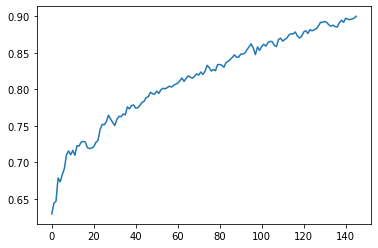

In [124]:
ns = np.arange(0, lim)
fig, ax = plt.subplots()
ax.plot(issim_arr)

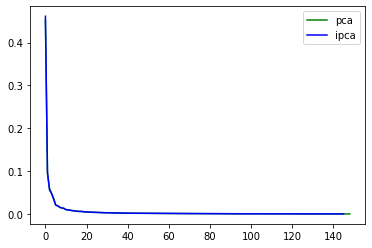

In [122]:
plt.plot(pca.explained_variance_ratio_, label='pca', color='green')
plt.plot(ipca.explained_variance_ratio_, label='ipca', color='blue')
plt.legend()